In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
covid_df=pd.read_csv("D:\Covid-19 Data.csv")

# Data Cleaning and exploration

In [3]:
covid_df.head(8)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,03-01-2020,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,04-01-2020,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,05-01-2020,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,06-01-2020,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,07-01-2020,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
5,AFG,Asia,Afghanistan,08-01-2020,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
6,AFG,Asia,Afghanistan,09-01-2020,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
7,AFG,Asia,Afghanistan,10-01-2020,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [4]:
covid_df.shape

(290038, 67)

In [5]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290038 entries, 0 to 290037
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    290038 non-null  object 
 1   continent                                   290038 non-null  object 
 2   location                                    290038 non-null  object 
 3   date                                        290038 non-null  object 
 4   total_cases                                 254267 non-null  float64
 5   new_cases                                   281307 non-null  float64
 6   new_cases_smoothed                          280103 non-null  float64
 7   total_deaths                                233965 non-null  float64
 8   new_deaths                                  281403 non-null  float64
 9   new_deaths_smoothed                         280233 non-null  float64
 

In [6]:
covid_df.drop(['new_cases_smoothed','new_deaths_smoothed','total_cases_per_million',
'new_cases_per_million', 'new_cases_smoothed_per_million','total_deaths_per_million','new_deaths_smoothed_per_million',
'new_deaths_per_million', 'icu_patients','icu_patients_per_million', 'hosp_patients',
'hosp_patients_per_million', 'weekly_icu_admissions','weekly_icu_admissions_per_million', 
'weekly_hosp_admissions','weekly_hosp_admissions_per_million','total_tests_per_thousand', 'new_tests_per_thousand',
'new_tests_smoothed', 'new_tests_smoothed_per_thousand','positive_rate', 'tests_per_case', 'tests_units', 'total_boosters', 
'new_vaccinations_smoothed','total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred','new_vaccinations_smoothed_per_million',
'new_people_vaccinated_smoothed','new_people_vaccinated_smoothed_per_hundred','handwashing_facilities',
'hospital_beds_per_thousand','excess_mortality_cumulative_absolute', 'excess_mortality_cumulative',
'excess_mortality', 'excess_mortality_cumulative_per_million','female_smokers', 'male_smokers'],axis=1,inplace=True)


In [7]:
covid_df.fillna(0,inplace=True)

In [8]:
covid_df = covid_df.reindex(columns=['iso_code', 'continent', 'location', 'date', 'population', 'human_development_index','total_cases', 
                                     'new_cases','total_deaths', 'new_deaths','total_vaccinations','new_vaccinations','people_vaccinated', 'people_fully_vaccinated',
                                     'reproduction_rate', 'total_tests', 'new_tests', 'stringency_index','gdp_per_capita',
                                     'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
                                     'extreme_poverty', 'cardiovasc_death_rate','diabetes_prevalence','life_expectancy'])

In [9]:
#pd.set_option('display.max_rows', 10000)
#pd.set_option('display.max_columns', 24)
pd.options.display.float_format = '{:,.2f}'.format

In [10]:
covid_df

,iso_code,continent,location,date,population,human_development_index,total_cases,new_cases,total_deaths,new_deaths,...,stringency_index,gdp_per_capita,population_density,median_age,aged_65_older,aged_70_older,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,life_expectancy
0,AFG,Asia,Afghanistan,03-01-2020,41128772,0.51,0.00,0.00,0.00,0.00,...,0.00,"1,803.99",54.42,18.60,2.58,1.34,0.00,597.03,9.59,64.83
1,AFG,Asia,Afghanistan,04-01-2020,41128772,0.51,0.00,0.00,0.00,0.00,...,0.00,"1,803.99",54.42,18.60,2.58,1.34,0.00,597.03,9.59,64.83
2,AFG,Asia,Afghanistan,05-01-2020,41128772,0.51,0.00,0.00,0.00,0.00,...,0.00,"1,803.99",54.42,18.60,2.58,1.34,0.00,597.03,9.59,64.83
3,AFG,Asia,Afghanistan,06-01-2020,41128772,0.51,0.00,0.00,0.00,0.00,...,0.00,"1,803.99",54.42,18.60,2.58,1.34,0.00,597.03,9.59,64.83
4,AFG,Asia,Afghanistan,07-01-2020,41128772,0.51,0.00,0.00,0.00,0.00,...,0.00,"1,803.99",54.42,18.60,2.58,1.34,0.00,597.03,9.59,64.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290033,ZWE,Africa,Zimbabwe,15-04-2023,16320539,0.57,"264,607.00",10.00,"5,684.00",0.00,...,0.00,"1,899.78",42.73,19.60,2.82,1.88,21.40,307.85,1.82,61.49
290034,ZWE,Africa,Zimbabwe,16-04-2023,16320539,0.57,"264,610.00",3.00,"5,684.00",0.00,...,0.00,"1,899.78",42.73,19.60,2.82,1.88,21.40,307.85,1.82,61.49
290035,ZWE,Africa,Zimbabwe,17-04-2023,16320539,0.57,"264,613.00",3.00,"5,684.00",0.00,...,0.00,"1,899.78",42.73,19.60,2.82,1.88,21.40,307.85,1.82,61.49
290036,ZWE,Africa,Zimbabwe,18-04-2023,16320539,0.57,"264,613.00",0.00,"5,684.00",0.00,...,0.00,"1,899.78",42.73,19.60,2.82,1.88,21.40,307.85,1.82,61.49


In [11]:
covid_df.rename(columns = {'location':'Country'}, inplace = True)

In [12]:
covid_df["Country"].nunique()

243

## Total Cases Vs Total Deaths

In [13]:
total_cases_total_deaths = pd.DataFrame({
    'Country': covid_df['Country'],
    'Date': covid_df['date'],
    'Total Cases': covid_df['total_cases'],
    'Total Deaths': covid_df['total_deaths'],
    'Death Percentage': covid_df['total_deaths'] / covid_df['total_cases']* 100
})

In [14]:
total_cases_total_deaths.loc[total_cases_total_deaths['Country'] == 'India']

,Country,Date,Total Cases,Total Deaths,Death Percentage
115452,India,03-01-2020,0.00,0.00,NaN
115453,India,04-01-2020,0.00,0.00,NaN
115454,India,05-01-2020,0.00,0.00,NaN
115455,India,06-01-2020,0.00,0.00,NaN
115456,India,07-01-2020,0.00,0.00,NaN
...,...,...,...,...,...
116655,India,20-04-2023,0.00,0.00,NaN
116656,India,21-04-2023,0.00,0.00,NaN
116657,India,22-04-2023,0.00,0.00,NaN
116658,India,23-04-2023,0.00,0.00,NaN


## Total Cases vs Population

In [15]:
Total_cases_total_population = pd.DataFrame({
    'Country': covid_df['Country'],
    'Date': covid_df['date'],
    'Total Cases': covid_df['total_cases'],
    'Population':covid_df['population'],
    'Infected Percentage':(covid_df['total_cases'] / covid_df['population'])*100
})


In [16]:
Total_cases_total_population.loc[Total_cases_total_population['Country'] == 'India']

,Country,Date,Total Cases,Population,Infected Percentage
115452,India,03-01-2020,0.00,1417173120,0.00
115453,India,04-01-2020,0.00,1417173120,0.00
115454,India,05-01-2020,0.00,1417173120,0.00
115455,India,06-01-2020,0.00,1417173120,0.00
115456,India,07-01-2020,0.00,1417173120,0.00
...,...,...,...,...,...
116655,India,20-04-2023,0.00,1417173120,0.00
116656,India,21-04-2023,0.00,1417173120,0.00
116657,India,22-04-2023,0.00,1417173120,0.00
116658,India,23-04-2023,0.00,1417173120,0.00


## Countries with Highest Infection Rate compared to Population

In [17]:
result=covid_df.groupby(['Country', 'population']).agg(
    {'total_cases': 'max'}).reset_index()

result['PercentPopulationInfected'] = result['total_cases'] / result['population'] * 100

result.sort_values('PercentPopulationInfected', ascending=False, inplace=True)

result.rename(columns={'total_cases': 'Max_Infection_Count','population':'Max_population'}, inplace=True)

result

,Country,Max_population,Max_Infection_Count,PercentPopulationInfected
52,Cyprus,896007,"656,904.00",73.31
187,San Marino,33690,"23,961.00",71.12
12,Austria,8939617,"6,054,092.00",67.72
68,Faeroe Islands,53117,"34,658.00",65.25
30,Brunei,449002,"285,740.00",63.64
...,...,...,...,...
222,Turkmenistan,6430777,0.00,0.00
62,England,56550000,0.00,0.00
93,Hong Kong,7488863,0.00,0.00
123,Macao,695180,0.00,0.00


## Countries with Highest Death Count per Population

In [18]:
output=covid_df.groupby(["Country","population"]).agg({'total_deaths':'max'}).reset_index()

output["Death_percentage"]=output["total_deaths"]/output["population"]*100

output.sort_values('Death_percentage', ascending=False, inplace=True)

output.rename(columns={'total_deaths': 'Max_death_Count','population':'Max_population'}, inplace=True)

output


,Country,Max_population,Max_death_Count,Death_percentage
168,Peru,34049588,"219,991.00",0.65
31,Bulgaria,6781955,"38,290.00",0.56
26,Bosnia and Herzegovina,3233530,"16,332.00",0.51
94,Hungary,9967304,"48,743.00",0.49
156,North Macedonia,2093606,"9,671.00",0.46
...,...,...,...,...
217,Tokelau,1893,0.00,0.00
190,Scotland,5466000,0.00,0.00
158,Northern Ireland,1896000,0.00,0.00
69,Falkland Islands,3801,0.00,0.00


## Effect of strigency index on new cases and new deaths

In [19]:
stringency_cases_deaths = covid_df[['date','stringency_index',"Country" ,'new_cases', 'new_deaths']]
stringency_cases_deaths=stringency_cases_deaths.loc[stringency_cases_deaths["Country"]=="India"]
stringency_cases_deaths["Death_percentage"]=stringency_cases_deaths["new_deaths"]/stringency_cases_deaths["new_cases"]*100

In [20]:
stringency_cases_deaths

,date,stringency_index,Country,new_cases,new_deaths,Death_percentage
115452,03-01-2020,0.00,India,0.00,0.00,NaN
115453,04-01-2020,0.00,India,0.00,0.00,NaN
115454,05-01-2020,0.00,India,0.00,0.00,NaN
115455,06-01-2020,0.00,India,0.00,0.00,NaN
115456,07-01-2020,0.00,India,0.00,0.00,NaN
...,...,...,...,...,...,...
116655,20-04-2023,0.00,India,0.00,0.00,NaN
116656,21-04-2023,0.00,India,0.00,0.00,NaN
116657,22-04-2023,0.00,India,0.00,0.00,NaN
116658,23-04-2023,0.00,India,0.00,0.00,NaN


## Countrywise Death Count

In [21]:
Total_death=covid_df[['Country',"new_deaths"]]

In [22]:
death_rate=Total_death.groupby('Country')["new_deaths"].sum()

In [23]:
sorted_data = death_rate.sort_values(ascending=False).head(5)
sorted_data

Country
United States   1,122,966.00
Brazil            700,811.00
India             531,152.00
Russia            397,901.00
Mexico            333,669.00
Name: new_deaths, dtype: float64

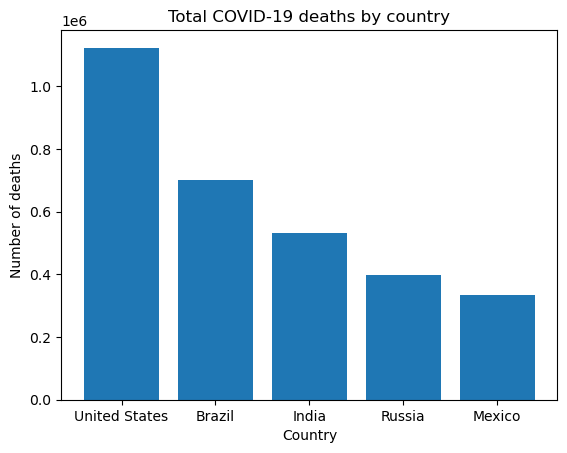

In [24]:
plt.bar(sorted_data.index, sorted_data.values)
plt.title("Total COVID-19 deaths by country")
plt.xlabel("Country")
plt.ylabel("Number of deaths")
plt.show()

## Countrywise Total Cases

In [25]:
total_cases=covid_df[["Country","new_cases"]].groupby("Country")["new_cases"].sum()
total_cases.sort_values(ascending=False)

Country
United States      102,977,396.00
China               99,240,488.00
India               44,835,613.00
France              38,843,098.00
Germany             38,385,526.00
                        ...      
North Korea                  0.00
Taiwan                       0.00
Northern Cyprus              0.00
Northern Ireland             0.00
Turkmenistan                 0.00
Name: new_cases, Length: 243, dtype: float64

## Continentwise Death Count

In [26]:
Continent_total_death=covid_df.groupby("continent")["new_deaths"].sum().sort_values(ascending=False).head(3)
Continent_total_death

continent
Europe          2,050,706.00
Asia            1,629,441.00
North America   1,596,578.00
Name: new_deaths, dtype: float64

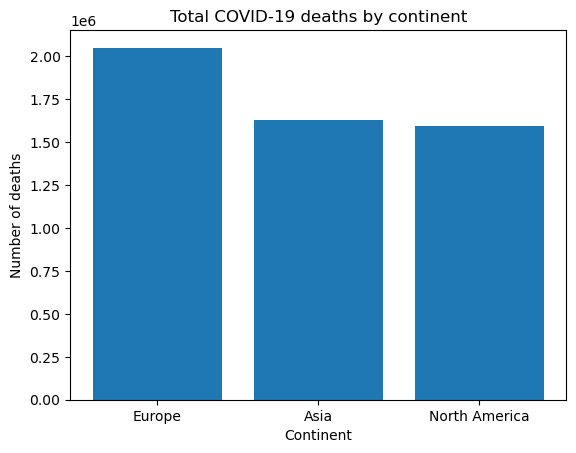

In [27]:
plt.bar(Continent_total_death.index, Continent_total_death.values)
plt.title("Total COVID-19 deaths by continent")
plt.xlabel("Continent")
plt.ylabel("Number of deaths")
plt.show()

## Continentwise total cases

In [28]:
Continent_total_cases=covid_df.groupby("continent")["new_cases"].sum().sort_values(ascending=False)
Continent_total_cases

continent
Asia            296,103,856.00
Europe          248,639,759.00
North America   123,632,489.00
South America    68,391,967.00
Oceania          13,908,795.00
Africa           13,077,962.00
Name: new_cases, dtype: float64

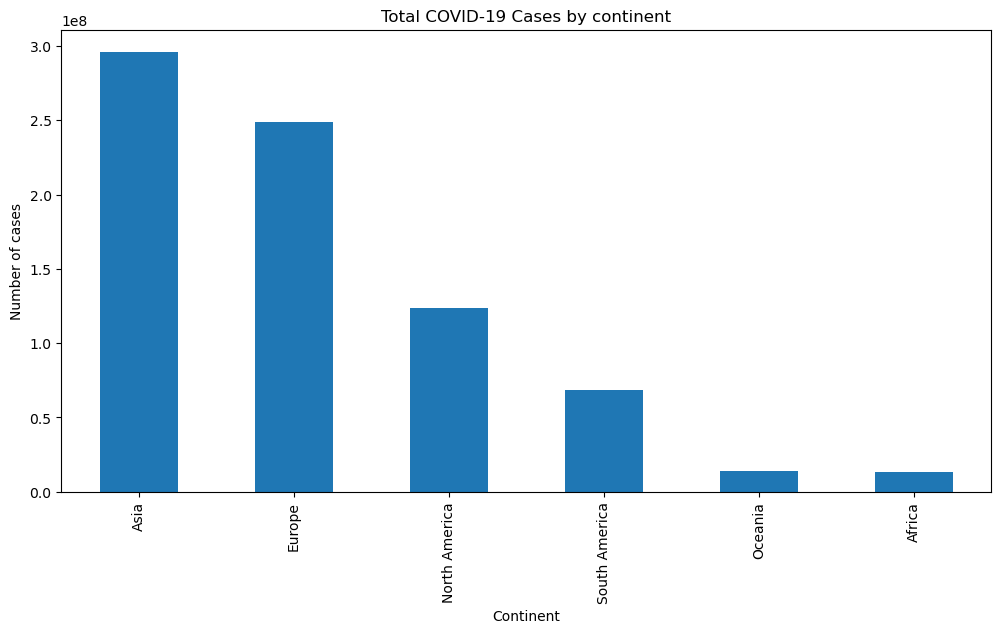

In [29]:
Continent_total_cases.plot(kind='bar', y='new_cases', figsize=(12,6))
plt.title("Total COVID-19 Cases by continent")
plt.xlabel("Continent")
plt.ylabel("Number of cases")
plt.show()

## continent death percentage

In [30]:
continent_death_percentage = (Continent_total_death / Continent_total_cases * 100).round(10)

In [31]:
Continent_death_percentage=pd.DataFrame({
    "Continent_cases":covid_df.groupby("continent")["new_cases"].sum(),
    "Continent_deaths":covid_df.groupby("continent")["new_deaths"].sum(),
    "Continent_death_percentage":continent_death_percentage
}

)
Continent_death_percentage

,Continent_cases,Continent_deaths,Continent_death_percentage
continent,,,
Africa,"13,077,962.00","258,873.00",NaN
Asia,"296,103,856.00","1,629,441.00",0.55
Europe,"248,639,759.00","2,050,706.00",0.82
North America,"123,632,489.00","1,596,578.00",1.29
Oceania,"13,908,795.00","25,997.00",NaN
South America,"68,391,967.00","1,353,500.00",NaN


## Countrywise Percentage of people fully vaccinated

In [32]:
o=covid_df.groupby(["Country"]).agg({"population":"max","people_fully_vaccinated":"max"})
o["percentage_fully_vaccinated"] = o["people_fully_vaccinated"] / o["population"] * 100
o=o.sort_values("people_fully_vaccinated",ascending=False).head(10)
o

,population,people_fully_vaccinated,percentage_fully_vaccinated
Country,,,
China,1425887360,"1,276,760,000.00",89.54
India,1417173120,"951,966,628.00",67.17
United States,338289856,"230,485,008.00",68.13
Brazil,215313504,"176,164,186.00",81.82
Indonesia,275501344,"172,693,321.00",62.68
Pakistan,235824864,"140,408,745.00",59.54
Bangladesh,171186368,"139,778,647.00",81.65
Japan,123951696,"103,374,308.00",83.40
Vietnam,98186856,"85,861,691.00",87.45


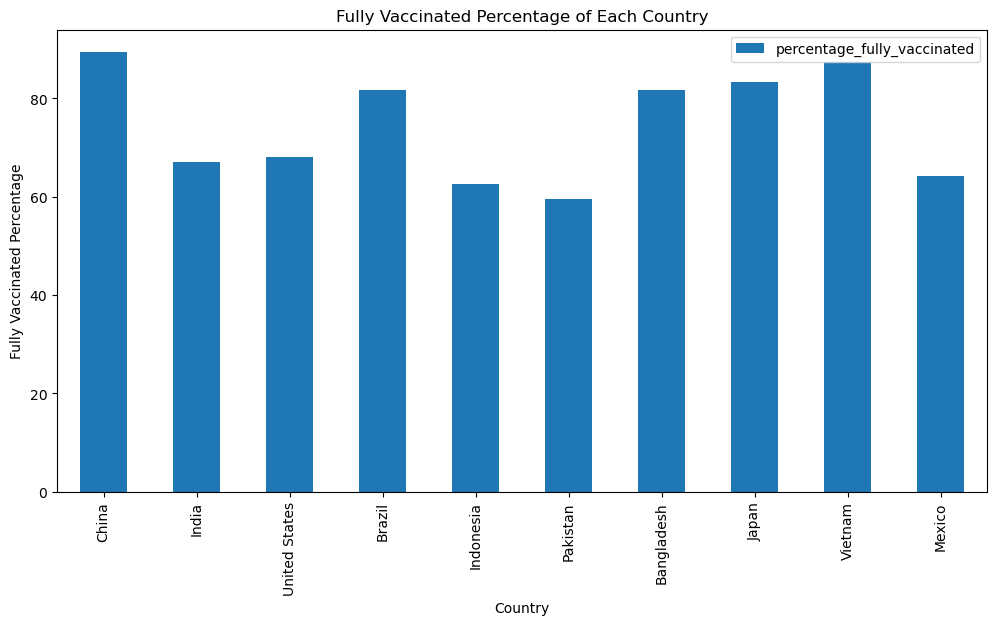

In [33]:

o.plot(kind='bar', y='percentage_fully_vaccinated', figsize=(12,6))
plt.xlabel('Country')
plt.ylabel('Fully Vaccinated Percentage')
plt.title('Fully Vaccinated Percentage of Each Country')
plt.show()

## Countrywise Percentage of people partially vaccinated

In [34]:
o=covid_df.groupby(["Country"]).agg({"population":"max","people_vaccinated":"max"})
o['percentage_partially_vaccinated'] = o["people_vaccinated"] / o["population"] * 100
o=o.sort_values("people_vaccinated",ascending=False).head(10)
o

,population,people_vaccinated,percentage_partially_vaccinated
Country,,,
China,1425887360,"1,310,292,000.00",91.89
India,1417173120,"1,027,403,591.00",72.50
United States,338289856,"269,971,358.00",79.80
Indonesia,275501344,"203,657,535.00",73.92
Brazil,215313504,"189,643,431.00",88.08
Pakistan,235824864,"165,530,412.00",70.19
Bangladesh,171186368,"151,319,642.00",88.39
Japan,123951696,"104,700,838.00",84.47
Mexico,127504120,"97,179,493.00",76.22


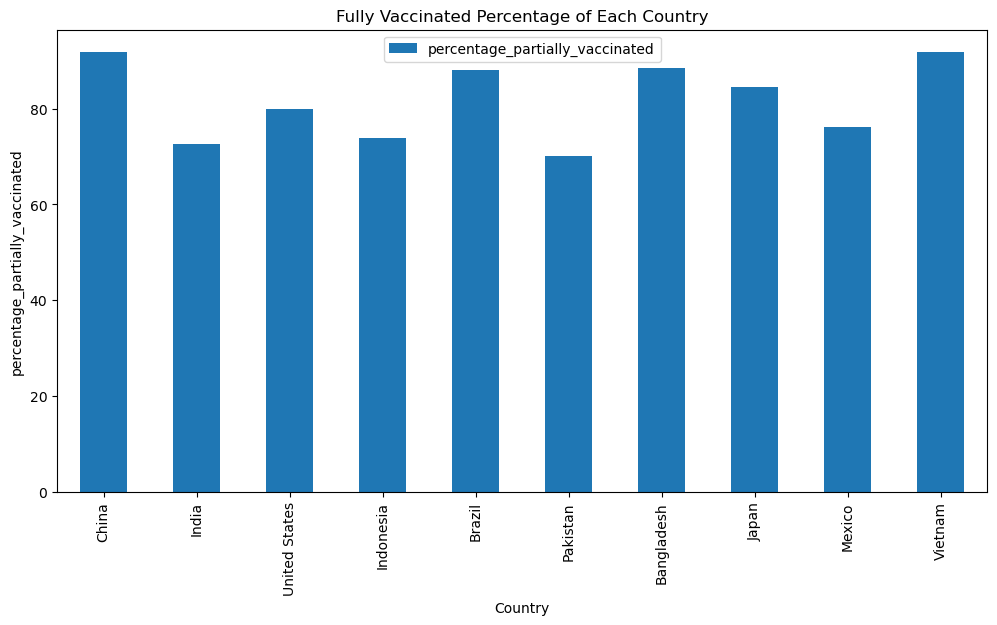

In [35]:

o.plot(kind='bar', y='percentage_partially_vaccinated', figsize=(12,6))
plt.xlabel('Country')
plt.ylabel('percentage_partially_vaccinated')
plt.title('Fully Vaccinated Percentage of Each Country')
plt.show()

## Continent Total Population vs Vaccinations

In [36]:
o=covid_df.groupby(["continent"]).agg({"population":"max","people_fully_vaccinated":"max"})
o["percentage_fully_vaccinated"] = o["people_fully_vaccinated"] / o["population"] * 100
o.sort_values("people_fully_vaccinated",ascending=False)

,population,people_fully_vaccinated,percentage_fully_vaccinated
continent,,,
Asia,1425887360,"1,276,760,000.00",89.54
North America,338289856,"230,485,008.00",68.13
South America,215313504,"176,164,186.00",81.82
Europe,144713312,"79,700,511.00",55.07
Africa,218541216,"69,793,071.00",31.94
Oceania,26177410,"21,654,488.00",82.72


## What is the correlation between COVID-19 cases and population density?

In [37]:
pop_density_cases = covid_df[['population_density', 'total_cases']]
corr_coef = pop_density_cases.corr()['population_density']['total_cases']
corr_coef

-0.021620181068381036

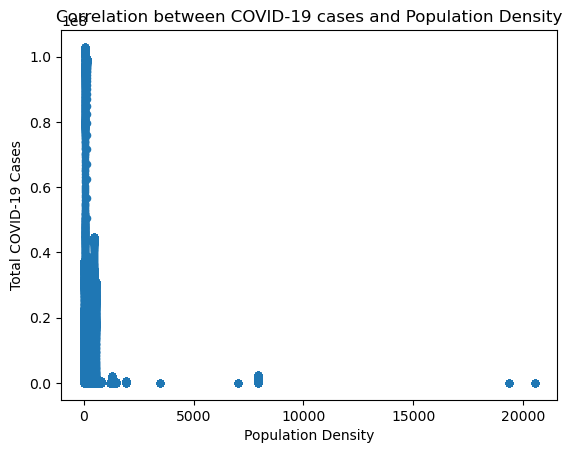

In [38]:
pop_density_cases.plot(kind='scatter', x='population_density', y='total_cases')
plt.xlabel('Population Density')
plt.ylabel('Total COVID-19 Cases')
plt.title('Correlation between COVID-19 cases and Population Density')
plt.show()